## Gradient Boosted on P1 Prediction for Test Set

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()
# Move up one directory level from EDA to the parent directory
parent_dir = os.path.dirname(current_dir)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'xdrive')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)

featureeng_path = os.path.join(parent_dir, 'Feature Engineering')
# Add the xdrive path to sys.path
sys.path.append(featureeng_path)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'Pipeline')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)
from build_a_pipeline import build_pipeline_P0_foward_price

In [2]:
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P1',drop_features = False)
model_performance = []
x_val = x_val.sort_index(ascending=True)
y_val = y_val.sort_index(ascending=True)
X_test = X_test.sort_index(ascending=True)
y_test = y_test.sort_index(ascending=True)
x_train = x_train.sort_index(ascending=True)
y_train = y_train.sort_index(ascending=True)
X_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

In [3]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
# Create XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_combined, y_combined)
# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

Mean Squared Error: 26745.723909956367
Root Mean Squared Error: 163.5411994268
Mean Squared Error: 26745.723909956367
Root Mean Squared Error: 163.5411994268
R-squared: -0.37845999315656176


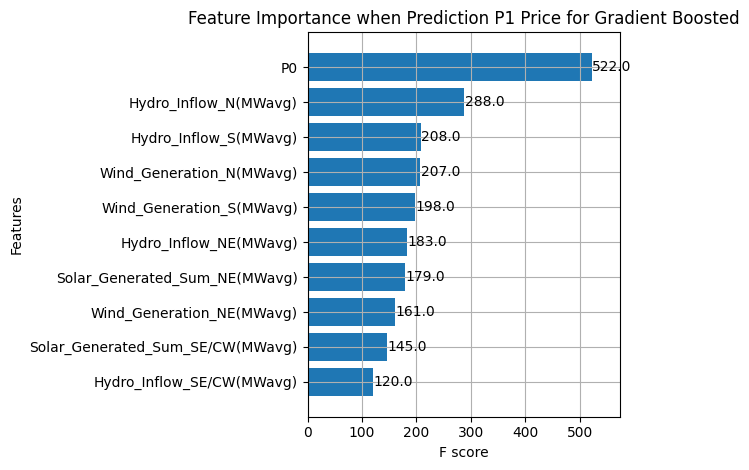

In [4]:
import matplotlib.pyplot as plt
# Plot feature importance using the built-in XGBoost plot_importance method
xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Feature Importance when Prediction P1 Price for Gradient Boosted')
plt.tight_layout()
plt.show()

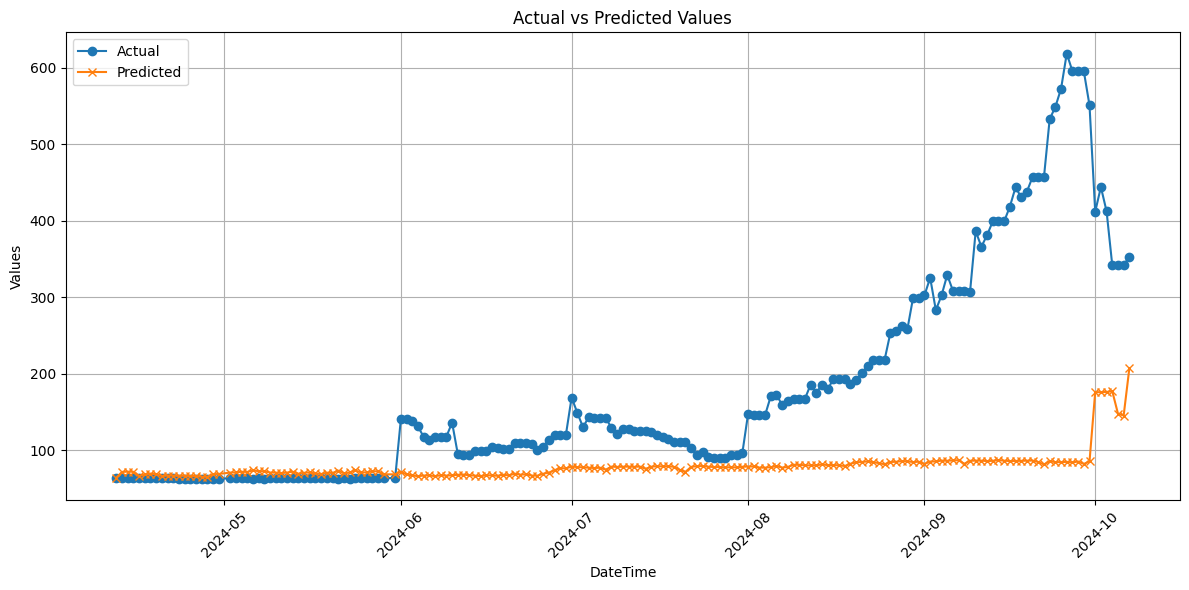

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, y_test, label='Actual', marker='o')
plt.plot(X_test.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Predict Last Month

In [9]:
last_2_months = X_test[X_test.index >= (X_test.index[-1] - pd.DateOffset(months=2))]
y_test_last = y_test[X_test.index >= (X_test.index[-1] - pd.DateOffset(months=2))]

In [10]:
y_pred = model.predict(last_2_months)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_test_last, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

Mean Squared Error: 26745.723909956367
Root Mean Squared Error: 163.5411994268
R-squared: -3.3680762620962312


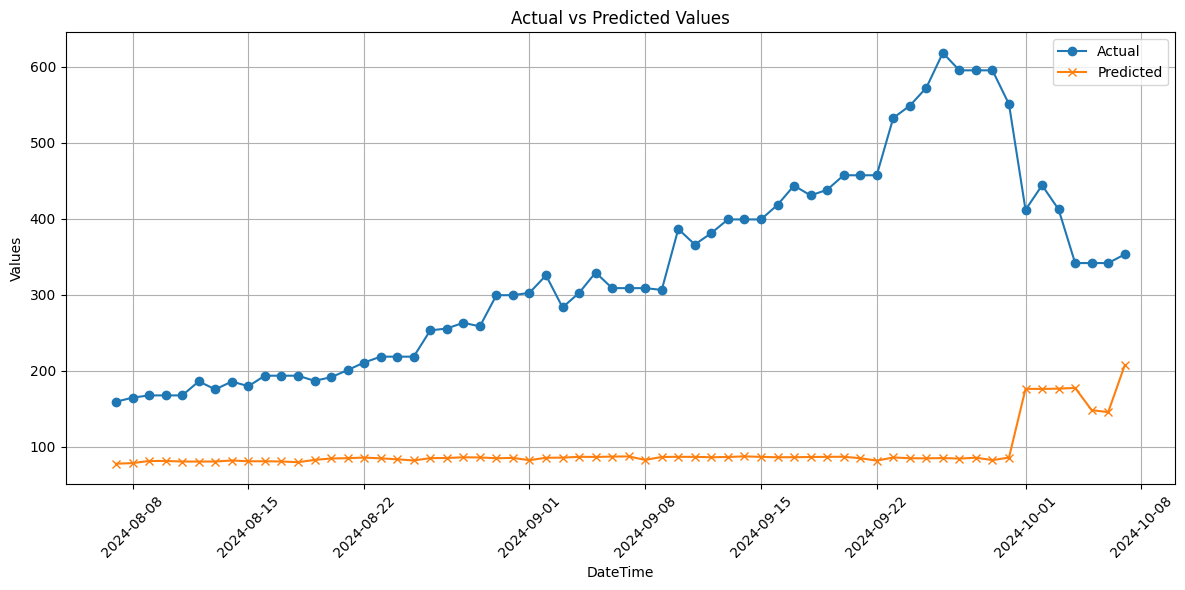

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(last_2_months.index, y_test_last, label='Actual', marker='o')
plt.plot(last_2_months.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

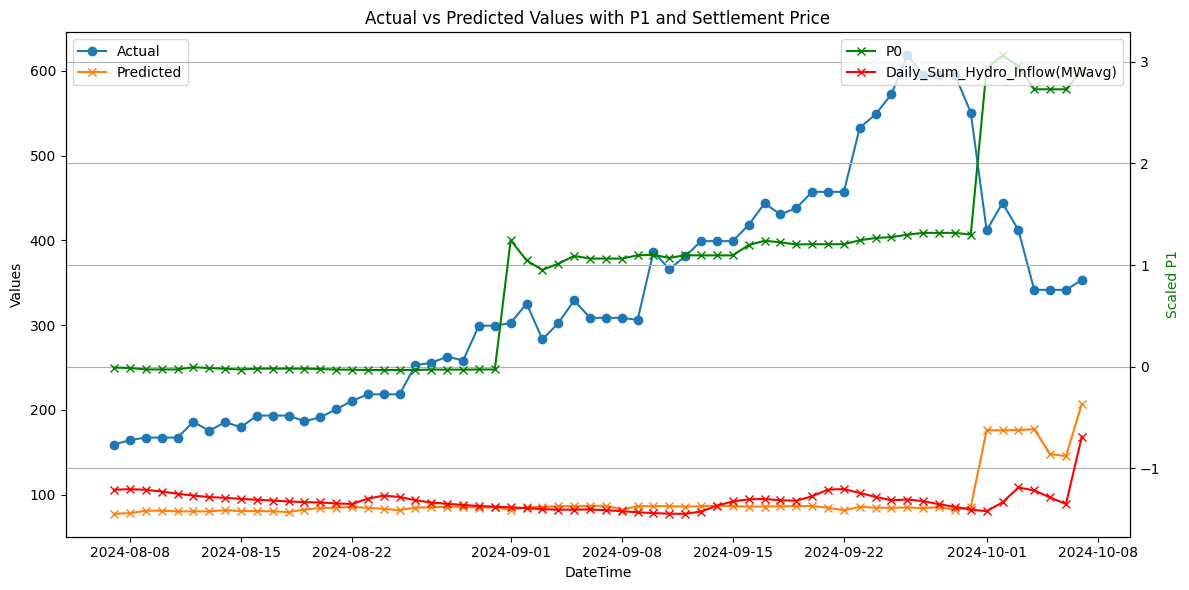

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Actual and Predicted values on the primary y-axis
plt.plot(last_2_months.index, y_test_last, label='Actual', marker='o')
plt.plot(last_2_months.index, y_pred, label='Predicted', marker='x')
#ax1.plot(x_val.index, x_val['Average_Settlement_Price_SE/CW(MWh)'], label='Settlement Price', marker='x')

# Set labels for the primary y-axis
ax1.set_xlabel('DateTime')
ax1.set_ylabel('Values')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot P1 on the secondary y-axis
ax2.plot(last_2_months.index, last_2_months['P0'], label='P0', color='green', marker='x')
ax2.plot(last_2_months.index, last_2_months['Daily_Sum_Hydro_Inflow(MWavg)'], label='Daily_Sum_Hydro_Inflow(MWavg)', color='red', marker='x')

# Set the labels for the secondary y-axis
ax2.set_ylabel('Scaled P1', color='green')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add grid and title
plt.grid(True)
plt.title('Actual vs Predicted Values with P1 and Settlement Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
